In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [2]:
mass = 1000
vi = 0
dt = 0.1
cd = 0.1

previous_speed = None

In [3]:
def velocity(throttle, current):
    global previous_speed
    #print(throttle, current)
    F = throttle - cd * current ** 2
    a = F/mass
    vf = current + a*dt # + np.random.normal(0, 0.1)
    
    if previous_speed is not None:
        # print(previous_speed, current, vf)
        m1 = (current - previous_speed) / dt 
        m2 = (vf - current) / dt
        if m2 != 0:
            m3 = 0.9 * m1 + 0.1 * m2
            vf = m3 / m2 * (vf-current) + current
            # print(vf)

    previous_speed = current
    
    return vf

In [4]:
kp = 100
ki = 1.5
kd = 50

In [5]:
# Variables to store previous values
prev_error = 0
integral = 0

def controller(target_speed, current_speed, dt):
    global prev_error, integral  # Keep values across function calls
    
    # Compute error
    error = target_speed - current_speed
    
    # Proportional term
    p = error
    
    # Integral term (accumulate over time)
    integral += error * dt
    
    # Derivative term (rate of change of error)
    d = (error - prev_error) / dt if dt > 0 else 0 
    
    # Compute PID output
    output = (kp * p) + (ki * integral) + (kd * d)
    
    # Store error for next derivative calculation
    prev_error = error
    
    return output

In [6]:
# def controller(target_speed, current_speed):
#     p = target_speed - current_speed
#     d = p/dt
#     i = current_speed * dt
#     return kp*p  + ki*i + kd*d

In [7]:
# define distance to obstacle
# dist_init = 100

# target = 80
# current = vi
# result = []
# for t in np.arange(0, 100, dt):
#     dist_remaining = dist_init - (current * t)

#     # stopping condition
#     if dist_remaining <= 0:
#         current = 0 
#         break

#     # slow down car as it approaches obstacle
#     if dist_remaining < (0.05 * dist_init):
#         throttle *= 0.5
    
#     throttle = controller(target, current, dt)
#     current = velocity(throttle, current)
#     result.append([t,throttle,current])

# target = 100
# for t in np.arange(100, 150, dt):
#     dist_remaining = dist_init - (current * t)

#     # stopping condition
#     if dist_remaining <= 0:
#         current = 0 
#         break

#     # slow down car as it approaches obstacle
#     if dist_remaining < (0.05 * dist_init):
#         throttle *= 0.5
        
#     throttle = controller(target, current, dt)
#     current = velocity(throttle, current)
#     result.append([t,throttle,current])

# target = 50
# for t in np.arange(150, 250, dt):
#     dist_remaining = dist_init - (current * t)

#     # stopping condition
#     if dist_remaining <= 0:
#         current = 0 
#         break

#     # slow down car as it approaches obstacle
#     if dist_remaining < (0.05 * dist_init):
#         throttle *= 0.5
        
#     throttle = controller(target, current, dt)
#     current = velocity(throttle, current)
#     result.append([t,throttle,current])

In [8]:
target_speeds = [80, 100, 50]  
time_range_set = [(0, 100), (100, 150), (150, 250)] 

current = vi
result = []

for i, target in enumerate(target_speeds):
    t_init, t_end = time_range_set[i] 
    
    # Reset initial distance for each segment
    initial_dist = 100  
    
    for t in np.arange(t_init, t_end, dt):
        dist_remaining = initial_dist -  sum([res[2] * dt for res in result if res[0] >= t_init])  # Distance remaining

        # Stop the car if it reaches obstacle
        if dist_remaining <= 0:
            current = 0  
            break
        
        # slow down car when within 10 % of the target
        if dist_remaining < (0.1 * initial_dist):
            throttle = max(throttle - (0.01 * throttle), 0)

        throttle = controller(target, current, dt)
        current = max(velocity(throttle, current), 0)

        result.append([t, throttle, current])

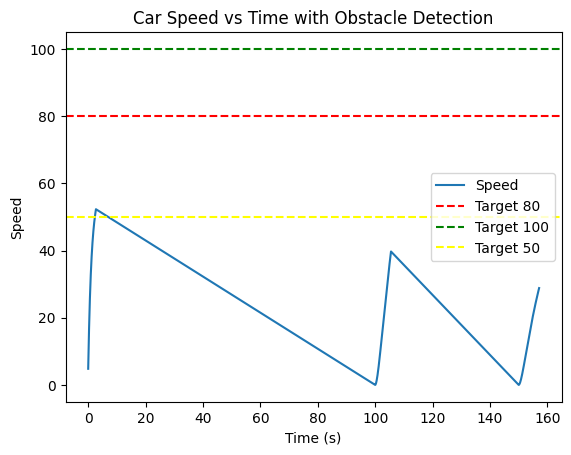

In [9]:
r = np.array(result)
plt.plot(r[:, 0], r[:, 2], label="Speed")
plt.axhline(80, color="red", linestyle="dashed", label="Target 80")
plt.axhline(100, color="green", linestyle="dashed", label="Target 100")
plt.axhline(50, color="yellow", linestyle="dashed", label="Target 50")

plt.xlabel("Time (s)")
plt.ylabel("Speed")
plt.legend()
plt.title("Car Speed vs Time with Obstacle Detection")
plt.show()